In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV


In [3]:
# Load the data from the Excel file
file_path = "E:\DATA SCIENCE\capstone\datasets\Copy of AnomaData.xlsx"
data = pd.read_excel(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

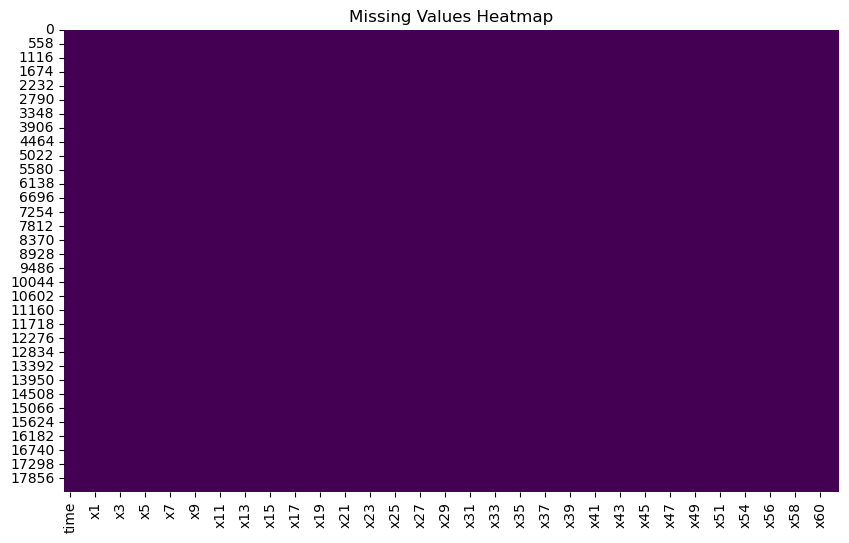

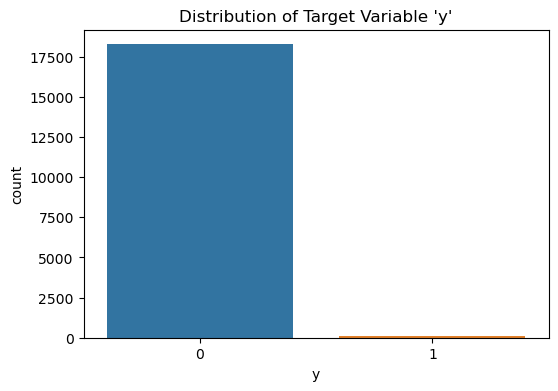

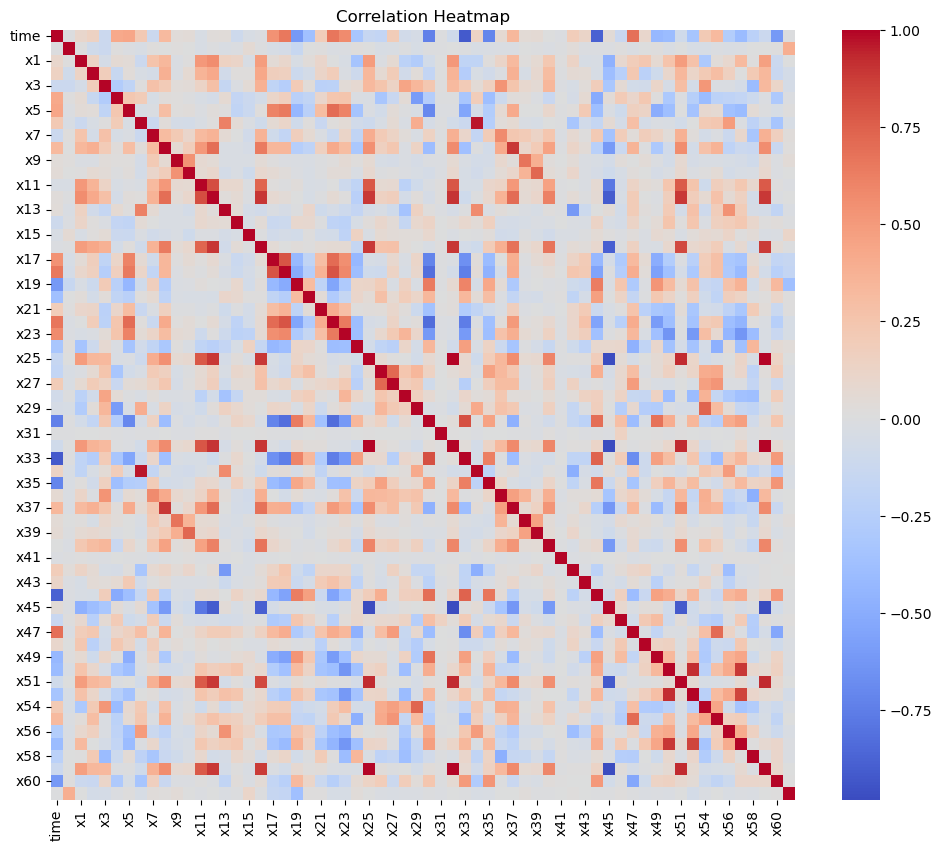

In [4]:
# Data quality check
print(data.info())
print(data.describe())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Handling missing values
data = data.fillna(method='ffill')

# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data)
plt.title("Distribution of Target Variable 'y'")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# Separate features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Select only numeric features for feature selection
X_numeric = X.select_dtypes(include=[float, int])

# Apply feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X_numeric, y)

# Get selected feature names
selected_features = X_numeric.columns[selector.get_support(indices=True)]
print(f"Selected Features: {selected_features}")

# Update the dataframe with selected features and target variable
data_selected = data[selected_features]
data_selected['y'] = y


Selected Features: Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'y.1'],
      dtype='object')


C:\Users\home\AppData\Local\Temp\ipykernel_9128\1633187382.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['y'] = y


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_selected.drop('y', axis=1), data_selected['y'], test_size=0.3, random_state=42)

# Verify the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 12878
Test set size: 5520


In [7]:
# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5491
           1       0.85      0.59      0.69        29

    accuracy                           1.00      5520
   macro avg       0.92      0.79      0.85      5520
weighted avg       1.00      1.00      1.00      5520

Confusion Matrix:
[[5488    3]
 [  12   17]]


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Reduced parameter grid for quicker testing
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Start time for debugging
start_time = time.time()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# End time for debugging
end_time = time.time()
print(f"GridSearchCV took {end_time - start_time:.2f} seconds.")

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")

# Update the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred_best = best_model.predict(X_test)
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV took 358.46 seconds.
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-validation Score: 0.9964280588554544
Best Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5491
           1       0.86      0.62      0.72        29

    accuracy                           1.00      5520
   macro avg       0.93      0.81      0.86      5520
weighted avg       1.00      1.00      1.00      5520

Best Model Confusion Matrix:
[[5488    3]
 [  11   18]]


In [11]:
import os

# Define the path for the new folder where cleaned data will be stored
processed_folder_path = "E:\\capstone_upgrad\\project1_anomadata\\data\\processed"

# Ensure the processed data directory exists (create if it doesn't)
os.makedirs(processed_folder_path, exist_ok=True)

# Define the file path for saving the cleaned data
cleaned_data_file_path = os.path.join(processed_folder_path, 'data_selected.csv')

# Save the cleaned data (data_selected) into the folder
data_selected.to_csv(cleaned_data_file_path, index=False)

print(f"Cleaned data (data_selected) saved to: {cleaned_data_file_path}")


Cleaned data (data_selected) saved to: E:\capstone_upgrad\project1_anomadata\data\processed\data_selected.csv


In [13]:
import pickle

In [14]:
# Define the path for the models folder
models_folder_path = "E:\\capstone_upgrad\\project1_anomadata\\models"

# Ensure the models directory exists (create if it doesn't)
os.makedirs(models_folder_path, exist_ok=True)

# Save the best model using pickle
model_file_path = os.path.join(models_folder_path, 'best_model.pkl')
with open(model_file_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to: {model_file_path}")

Best model saved to: E:\capstone_upgrad\project1_anomadata\models\best_model.pkl


In [15]:
# In Jupyter Notebook, use an exclamation mark to run shell commands
!pip freeze > requirements.txt
